# Prepare CIFAR10 Dataset and Neural Network

### Load Library

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns

# visualise
import matplotlib.pyplot as plt

import pickle
import os

# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from PIL import Image

### Load CIFAR10 DATA and store as image

In [64]:
# import CIFAR10 data
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [65]:
# Reshape the data
image_vector_size = 32 * 32 * 3
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Adjust column names to account for RGB channels
column_names = [f"{i+1}x{j+1}x{c+1}" for i in range(32) for j in range(32) for c in range(3)]

# Convert to DataFrame and set column names
x_train = pd.DataFrame(x_train, columns=column_names)
x_test = pd.DataFrame(x_test, columns=column_names)

# Convert y_train and y_test to DataFrames
y_train = pd.DataFrame(y_train, columns=['label'])
y_test = pd.DataFrame(y_test, columns=['label'])

# Display first few rows to confirm
x_train.head()

,1x1x1,1x1x2,1x1x3,1x2x1,1x2x2,1x2x3,1x3x1,1x3x2,1x3x3,1x4x1,...,32x29x3,32x30x1,32x30x2,32x30x3,32x31x1,32x31x2,32x31x3,32x32x1,32x32x2,32x32x3
0,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80


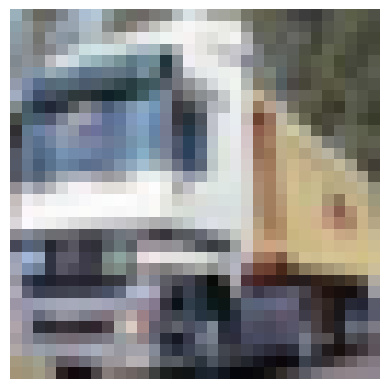

In [67]:
# visualise
img = x_train.iloc[1,:].array.reshape(32,32,3)
plt.imshow(img)
plt.axis("off")
plt.show()

### EDA

In [68]:
# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)

print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

# Check for Missing Values
print("Missing values in Training dataset:", x_train.isnull().sum().sum())
print("Missing values in Testing dataset:", x_test.isnull().sum().sum())

Training data shape: (50000, 3072)
Training labels shape: (50000, 1)
Testing data shape: (10000, 3072)
Testing labels shape: (10000, 1)
Missing values in Training dataset: 0
Missing values in Testing dataset: 0


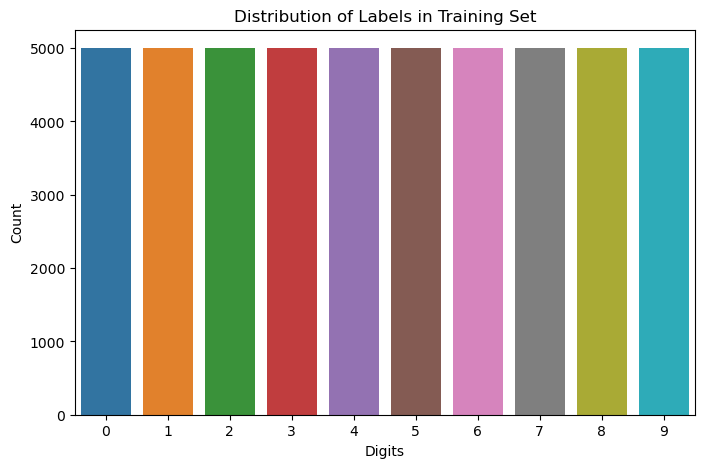

In [69]:
# Distribution of Labels in Training Set
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train["label"].values)
plt.title("Distribution of Labels in Training Set")
plt.xlabel("Digits")
plt.ylabel("Count")
plt.show()

The dataset is considered balanced due to the equal number of samples across each category.

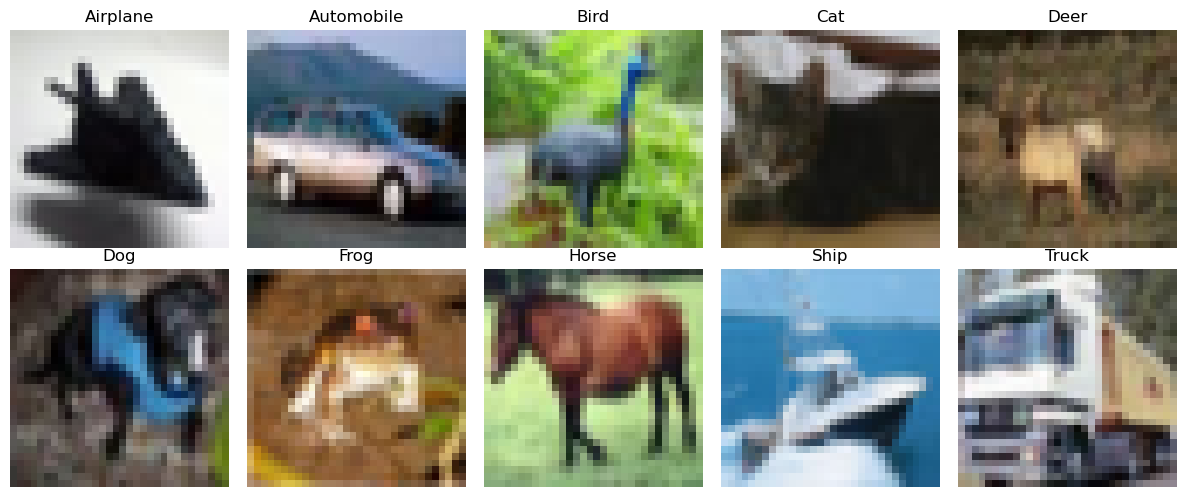

In [70]:
# Visualize Sample Images for Each Label
cifar10_labels = {
    0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 
    4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 
    8: 'Ship', 9: 'Truck'
}
# Collect a single sample for each category to visualize
sample_indices = [y_train[y_train['label'] == i].index[0] for i in range(10)]

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for idx, ax in enumerate(axes.flat):
    # Reshape the vector back to 32x32x3 and display it
    img = x_train.iloc[sample_indices[idx], :].values.reshape(32, 32, 3)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"{cifar10_labels[y_train.iloc[sample_indices[idx], 0]]}")  # Access directly
plt.tight_layout()
plt.show()

In [71]:
# Create directories to save images
os.makedirs('../data/CIFAR10/train', exist_ok=True)
os.makedirs('../data/CIFAR10/test', exist_ok=True)

# Save x_train images
for index, row in x_train.iterrows():
    image_array = row.values.reshape(32, 32, 3).astype(np.uint8)  # Reshape and convert to uint8
    image = Image.fromarray(image_array)  # Create an image from the array
    image.save(f'../data/CIFAR10/train/image_{index+1}.JPEG')  # Save the image

# Save x_test images
for index, row in x_test.iterrows():
    image_array = row.values.reshape(32, 32, 3).astype(np.uint8)  # Reshape and convert to uint8
    image = Image.fromarray(image_array)  # Create an image from the array
    image.save(f'../data/CIFAR10/test/image_{index+1}.JPEG')  # Save the image

print("Images saved successfully!")

Images saved successfully!


In [72]:
# Define paths to the train and test image directories
train_dir = '../data/CIFAR10/train'
test_dir = '../data/CIFAR10/test'

# Function to count the number of images in a directory
def count_images(directory):
    return len([name for name in os.listdir(directory) if name.endswith('.JPEG')])

# Count images in the training directory
train_image_count = count_images(train_dir)
print(f'Number of images in the training folder: {train_image_count}')

# Count images in the testing directory
test_image_count = count_images(test_dir)
print(f'Number of images in the testing folder: {test_image_count}')

Number of images in the training folder: 50000
Number of images in the testing folder: 10000


In [73]:
# Create dictionary for training data
train_data_dict = {f'image_{index + 1}': int(y_train.iloc[index]['label']) for index in range(len(y_train))}

# Create dictionary for testing data
test_data_dict = {f'image_{index + 1}': int(y_test.iloc[index]['label']) for index in range(len(y_test))}

# Save dictionaries to pickle files
with open('../data/CIFAR10/train_data.pickle', 'wb') as f:
    pickle.dump(train_data_dict, f)

with open('../data/CIFAR10/test_data.pickle', 'wb') as f:
    pickle.dump(test_data_dict, f)

print("Pickle files created successfully!")

Pickle files created successfully!


In [74]:
with open('../data/CIFAR10/train_data.pickle', 'rb') as file:
    wnid_to_label = pickle.load(file)
wnid_to_label

{'image_1': 6,
 'image_2': 9,
 'image_3': 9,
 'image_4': 4,
 'image_5': 1,
 'image_6': 1,
 'image_7': 2,
 'image_8': 7,
 'image_9': 8,
 'image_10': 3,
 'image_11': 4,
 'image_12': 7,
 'image_13': 7,
 'image_14': 2,
 'image_15': 9,
 'image_16': 9,
 'image_17': 9,
 'image_18': 3,
 'image_19': 2,
 'image_20': 6,
 'image_21': 4,
 'image_22': 3,
 'image_23': 6,
 'image_24': 6,
 'image_25': 2,
 'image_26': 6,
 'image_27': 3,
 'image_28': 5,
 'image_29': 4,
 'image_30': 0,
 'image_31': 0,
 'image_32': 9,
 'image_33': 1,
 'image_34': 3,
 'image_35': 4,
 'image_36': 0,
 'image_37': 3,
 'image_38': 7,
 'image_39': 3,
 'image_40': 3,
 'image_41': 5,
 'image_42': 2,
 'image_43': 2,
 'image_44': 7,
 'image_45': 1,
 'image_46': 1,
 'image_47': 1,
 'image_48': 2,
 'image_49': 2,
 'image_50': 0,
 'image_51': 9,
 'image_52': 5,
 'image_53': 7,
 'image_54': 9,
 'image_55': 2,
 'image_56': 2,
 'image_57': 5,
 'image_58': 2,
 'image_59': 4,
 'image_60': 3,
 'image_61': 1,
 'image_62': 1,
 'image_63': 8,
 